## Librerías

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import lightgbm as lgb




from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree,  _tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.metrics import f1_score

from umap import UMAP
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.ensemble import  RandomForestClassifier
from sklearn.impute import SimpleImputer
from joblib import Parallel, delayed
from time import time
import duckdb
# %load_ext sql
# %config SqlMagic.autopandas = True
# %config SqlMagic.feedback = False
# %config SqlMagic.displaycon = False
# %sql duckdb:///:memory:
import time
import optuna
from optuna.study import MaxTrialsCallback
from optuna.trial import TrialState

from optuna.visualization import plot_param_importances, plot_contour,  plot_slice, plot_optimization_history
import plotly.express as px
import os

import kaggle 
import glob



In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [4]:
semillas =[ 400009,  500009,  600011,  700021,  800021]

In [5]:
# # import duckdb


# con = duckdb.connect(database=':memory:', read_only=False)

# ruta_csv = r'C:\Users\Admin\Documents\1_Notebook\1_Estudio\1_UBA_Maestria_DS\1_Especializacion\1_Segundo_Semestre\DMEyF\Git\dmeyf2024\datasets\competencia_01.csv'

# con.execute(f"CREATE TABLE df_train AS SELECT * FROM read_csv_auto('{ruta_csv}')")


In [6]:
# df_train = pd.read_csv(r"C:\Users\Admin\Documents\1_Notebook\1_Estudio\1_UBA_Maestria_DS\1_Especializacion\1_Segundo_Semestre\DMEyF\Git\dmeyf2024\datasets\competencia_01.csv")

In [7]:
# import pandas as pd



# import numpy as np



# df_parallel = pd.read_csv(r"C:\Users\Admin\Documents\1_Notebook\1_Estudio\1 UBA Maestría DS\1_Especialización\1_Segundo Semestre\DMEyF\Git\dmeyf2024\datasets\competencia_01_crudo.csv")



# start_time = time.time()

# # Crear la columna clase_ternaria usando la columna 'foto_mes' basada en la presencia real

# df_ternaria= duckdb.query('''

#     WITH siguiente_mes AS (

#         SELECT

#             numero_de_cliente,

#             foto_mes,

#             -- Obtener los meses siguientes en los que el cliente está presente

#             LEAD(foto_mes, 1) OVER (PARTITION BY numero_de_cliente ORDER BY foto_mes) AS foto_mes_proximo1,

#             LEAD(foto_mes, 2) OVER (PARTITION BY numero_de_cliente ORDER BY foto_mes) AS foto_mes_proximo2

#         FROM df_parallel

#     )

#     SELECT

#         numero_de_cliente,

#         foto_mes,

#         CASE

#             -- Si el cliente está en los dos meses consecutivos siguientes

#             WHEN foto_mes_proximo1 = foto_mes + 1 AND foto_mes_proximo2 = foto_mes + 2 THEN 'CONTINUA'

#             -- Si el cliente no está en el siguiente mes

#             WHEN foto_mes_proximo1 IS NULL OR foto_mes_proximo1 <> foto_mes + 1 THEN 'BAJA+1'

#             -- Si el cliente está en el siguiente mes pero no en el segundo mes consecutivo

#             WHEN foto_mes_proximo1 = foto_mes + 1 AND (foto_mes_proximo2 IS NULL OR foto_mes_proximo2 <> foto_mes + 2) THEN 'BAJA+2'

#             ELSE NULL

#         END AS clase_ternaria

#     FROM siguiente_mes

#     ORDER BY numero_de_cliente, foto_mes

#     ''')

# df_ternaria = df_ternaria.to_df()
# df_ternaria = df_ternaria[['numero_de_cliente', 'foto_mes', 'clase_ternaria']]


# df_parallel = df_parallel.merge(df_ternaria, on=['numero_de_cliente', 'foto_mes'], how='left')

# df_parallel.to_csv(r"C:\Users\Admin\Documents\1_Notebook\1_Estudio\1 UBA Maestría DS\1_Especialización\1_Segundo Semestre\DMEyF\Git\dmeyf2024\datasets\competencia_01.csv", index=False)

df_train.columns.values

# Feature Engineering

In [8]:
# con.execute('''
# CREATE OR REPLACE TABLE df_train AS
# SELECT *,
#     (COALESCE(mpayroll, 0) - COALESCE(mcuentas_saldo, 0)) / NULLIF(ctrx_quarter, 0) AS intensidad_gasto
# FROM df_train
# ''')

In [9]:
# df_train['intensidad_gasto'] = (df_train['mpayroll'].fillna(0) - df_train['mcuentas_saldo'].fillna(0)) / df_train['ctrx_quarter'].replace(0, pd.NA)

In [10]:
# con.execute('''
# create or replace table df_train as
# select 
#     *,
#     (IFNULL(visa_msaldototal, 0) + IFNULL(master_msaldototal, 0)) as t_saldo_total
# FROM df_train''')




In [11]:
# df_train['t_saldo_total'] = df_train['Visa_msaldototal'].fillna(0) + df_train['Master_msaldototal'].fillna(0)

In [12]:
# con.execute('''
# create or replace table df_train as
# select 
#     *,
#     (ifnull(Master_mconsumototal,0) + ifnull(Visa_mconsumototal,0)) as t_consumo_total
# from df_train''')


In [13]:
# con.execute('''
#             create or replace table df_train as
#             select 
#                     *,
#             (IFNULL(t_consumo_total,0) - IFNULL(mpayroll,0)) /NULLIF((IFNULL(mcuentas_saldo, 0) - IFNULL(t_saldo_total,0)), 0) as nivel_endeudamiento, 
#             FROM df_train''')

In [14]:
# df_train['t_consumo_total'] = df_train['Master_mconsumototal'].fillna(0) + df_train['Visa_mconsumototal'].fillna(0)

In [15]:
# con.execute('''
# create or replace table df_train as
# select
#     *,
#     (case when visa_status = 0 then True end) as T_Visa_normal,
#     (case when Master_status = 0 then True end) as T_Master_normal
# from df_train''')

In [16]:
# df_train['T_Visa_normal'] = df_train['Visa_status'] == 0


# df_train['T_Master_normal'] = df_train['Master_status'] == 0

In [17]:
# con.execute('''
# create or replace table df_train as
# select *
#     , greatest(Master_Fvencimiento, Visa_Fvencimiento) as tc_fvencimiento_mayor
#     , least(Master_Fvencimiento, Visa_Fvencimiento) as tc_fvencimiento_menor
# from df_train''')

In [18]:
# con.execute('''
# create or replace table df_train as
# select *,
#     lag (nivel_endeudamiento, 1) over (
#         partition by numero_de_cliente 
#         order by foto_mes
#     ) as lag_endeudamiento1,
#     lag (nivel_endeudamiento, 2) over (
#         partition by numero_de_cliente 
#         order by foto_mes
#     ) as lag_endeudamiento2
# from df_train''')


In [19]:
# con.execute('''create or replace table df_train as
#     select *
#     , Master_mpagado+Visa_mpagado as tarjeta_total_pagado
#     from df_train''')

In [20]:
# con.execute('''create or replace table df_train as
#     select *
#     ,IFNULL(tarjeta_total_pagado, 0) / NULLIF(IFNULL(mprestamos_personales,0),0) as actitud_pago
#             from df_train''')

In [21]:
# con.execute('''
# create or replace table df_train as
# select *,
#     lag (actitud_pago, 1) over (
#         partition by numero_de_cliente 
#         order by foto_mes
#     ) as lag_actitud_pago_1,
#     lag (actitud_pago, 2) over (
#         partition by numero_de_cliente 
#         order by foto_mes
#     ) as lag_actitud_pago_2
# from df_train''')

In [22]:
# df_train['T_Visa_normal'] = df_train['Visa_status'] == 0

# # Calcular la nueva columna T_Master_normal
# df_train['T_Master_normal'] = df_train['Master_status'] == 0

In [23]:
# con.execute('''
# create or replace table df_train as
# select *,
#     lag (ctrx_quarter, 1) over (
#         partition by numero_de_cliente 
#         order by foto_mes
#     ) as lag_ctrx_quarter1,
#     lag (ctrx_quarter, 2) over (
#         partition by numero_de_cliente 
#         order by foto_mes
#     ) as lag_ctrx_quarter2
# from df_train''')


In [24]:

# con.execute('''
# create or replace table df_train as
# select *,
#     lag (mpayroll, 1) over (
#         partition by numero_de_cliente 
#         order by foto_mes
#     ) as lag_mpayroll1,
#     lag (mpayroll, 2) over (
#         partition by numero_de_cliente 
#         order by foto_mes
#     ) as lag_mpayroll2
# from df_train''')


In [25]:

# df_sorted = df_train.sort_values(by=['numero_de_cliente', 'foto_mes'])


# df_train['lag_ctrx_quarter1'] = df_sorted.groupby('numero_de_cliente')['ctrx_quarter'].shift(1)


# df_train['lag_ctrx_quarter2'] = df_sorted.groupby('numero_de_cliente')['ctrx_quarter'].shift(2)

In [26]:
# con.execute('''
# create or replace table df_train as
# select * 
#     , lag (t_consumo_total, 1) over (
#         partition by numero_de_cliente 
#         order by foto_mes, numero_de_cliente
#     ) as lag_consumo_total1
#     , lag (t_consumo_total, 2) over (
#         partition by numero_de_cliente 
#         order by foto_mes, numero_de_cliente
#     ) as lag_consumo_total2
# from df_train''')

In [27]:
# con.execute('''create or replace table df_train as
# select *
#   , ctrx_quarter - lag_ctrx_quarter1 as delta_1_ctrx_quarter
#   , ctrx_quarter - lag_ctrx_quarter2 as delta_1_ctrx_quarter
# from df_train''')

In [28]:

# con.execute('''create or replace table df_train as
# select *
#   , t_consumo_total - lag_consumo_total1 as delta_1_lag_confumo_total
#   , t_consumo_total - lag_consumo_total2 as delta_2_lag_consumo_total
# from df_train''')

In [29]:
# con.execute(''' create or replace table df_train as
# select *
#   ,         IFNULL (t_consumo_total,0) / NULLIF (IFNULL (mpayroll,0),0) as consumo_vs_payroll
#             from df_train''')

In [30]:
# con.execute('''
# create or replace table df_train as
# select * 
#     , lag (consumo_vs_payroll, 1) over (
#         partition by numero_de_cliente 
#         order by foto_mes, numero_de_cliente
#     ) as lag_consumo_vs_payroll_1
#     , lag (consumo_vs_payroll, 2) over (
#         partition by numero_de_cliente 
#         order by foto_mes, numero_de_cliente
#     ) as lag_consumo_vs_payroll_2
# from df_train''')

In [31]:
# # Ordenar el DataFrame por 'numero_de_cliente' y 'foto_mes'
# df_sorted = df_train.sort_values(by=['numero_de_cliente', 'foto_mes'])

# # Calcular la columna 'lag_consumo_total1'
# df_train['lag_consumo_total1'] = df_sorted.groupby('numero_de_cliente')['t_consumo_total'].shift(1)

# # Calcular la columna 'lag_consumo_total2'
# df_train['lag_consumo_total2'] = df_sorted.groupby('numero_de_cliente')['t_consumo_total'].shift(2)

In [32]:
# con.execute('''
            
    
# create or replace table df_train as
# select *
#     , percent_rank() over (partition by foto_mes order by cliente_antiguedad,numero_de_cliente) as cliente_antiguedad_dd
#     , percent_rank() over (partition by foto_mes order by cliente_edad,numero_de_cliente) as cliente_edad_dd
#     , percent_rank() over (partition by foto_mes order by ctrx_quarter,numero_de_cliente) as ctrx_quarter_dd
#     , percent_rank() over (partition by foto_mes order by mactivos_margen,numero_de_cliente) as mactivos_margen_dd
#     , percent_rank() over (partition by foto_mes order by mpayroll,numero_de_cliente) as mpayroll_dd
#     , percent_rank() over (partition by foto_mes order by intensidad_gasto,numero_de_cliente) as intensidad_gasto_dd
#     , percent_rank() over (partition by foto_mes order by cproductos,numero_de_cliente) as cproductos_dd
# from df_train''')



In [33]:
# con.execute('''create or replace table df_train as
# select *, 
#             greatest(ctarjeta_visa_transacciones, ctarjeta_master_transacciones) as max_tarjeta_transacciones,
#             greatest(ccallcenter_transacciones, chomebanking_transacciones) as max_dig_analog_transacciones,
#             least(ctarjeta_debito_transacciones, ctarjeta_visa_transacciones) as min_tarjeta_debito_transacciones,
#             least(ctarjeta_visa_transacciones, ctarjeta_master_transacciones) as min_tarjeta_master_transacciones,
#             least(ccallcenter_transacciones, chomebanking_transacciones) as min_callcenter_transacciones,
#             from df_train''')
            

In [34]:
# # Calcular percent_rank para cada columna
# df_train['cliente_antiguedad_dd'] = df_train.groupby('foto_mes')['cliente_antiguedad'].rank(method='min', pct=True)
# df_train['cliente_edad_dd'] = df_train.groupby('foto_mes')['cliente_edad'].rank(method='min', pct=True)
# df_train['ctrx_quarter_dd'] = df_train.groupby('foto_mes')['ctrx_quarter'].rank(method='min', pct=True)
# df_train['mactivos_margen_dd'] = df_train.groupby('foto_mes')['mactivos_margen'].rank(method='min', pct=True)
# df_train['mpayroll_dd'] = df_train.groupby('foto_mes')['mpayroll'].rank(method='min', pct=True)
# df_train['intensidad_gasto_dd'] = df_train.groupby('foto_mes')['intensidad_gasto'].rank(method='min', pct=True)
# df_train['cproductos_dd'] = df_train.groupby('foto_mes')['cproductos'].rank(method='min', pct=True)

In [35]:
# df_train = con.execute('''SELECT * FROM df_train''').fetch_df()


In [36]:
# con.close()

In [37]:
# df_train.shape

In [38]:
# df_train.to_csv(r"C:\Users\Admin\Documents\1_Notebook\1_Estudio\1_UBA_Maestria_DS\1_Especializacion\1_Segundo_Semestre\DMEyF\Git\dmeyf2024\datasets\competencia_03_f_e.csv", index=False)
df_train = pd.read_csv(r"C:\Users\Admin\Documents\1_Notebook\1_Estudio\1_UBA_Maestria_DS\1_Especializacion\1_Segundo_Semestre\DMEyF\Git\dmeyf2024\datasets\competencia_03_f_e.csv", index_col=False)    

In [39]:
df_train.shape

(981946, 194)

### Modelo para variables más importantes + optimización 

In [40]:
# mod = sklearn.ensemble.RandomForestClassifier(n_estimators=400, min_samples_leaf=200, random_state=semillas[1])
# X = df_train.drop(columns=['clase_ternaria'])

# X = X.select_dtypes(include=['float64', 'int64'])
# Y = df_train['clase_ternaria'].map(lambda x: 0 if x == 'CONTINUA' else 1)
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
# X_imp = imp_mean.fit_transform(X)
# mod.fit(X_imp, Y)
# importances = mod.feature_importances_
# feature_names = X.columns


# feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
# feature_importances = feature_importances.sort_values(by='importance', ascending=False)


In [41]:
# # # features + importantes
# # #feature_most_important = feature_importances.query('importance > 0.01')
# # #pd.set_option('display.max_rows', 50)
# # #feature_most_important['feature'].tolist()

lista_feature_importances = ['mrentabilidad_annual',
 'delta_1_ctrx_quarter_1',
 'mcuentas_saldo',
 'mpasivos_margen',
 'Visa_mfinanciacion_limite',
 'delta_1_ctrx_quarter',
 'mrentabilidad',
 'Visa_fechaalta',
 'chomebanking_transacciones',
 'Master_fechaalta']

In [42]:


def multiplicador(df, lista):
    for i in range(len(lista)):
        for j in range(i+1, len(lista)):
            variable1 = lista[i]
            variable2 = lista[j]
            nombre = f"{variable1}_x_{variable2}"
            df[nombre] = df[variable1] * df[variable2]
    return df




def distancias(df, lista):
    combinaciones = itertools.combinations(lista, 4)
    new_columns = {}  

    for comb in combinaciones:
        variable1, variable2, variable3, variable4 = comb
        nombre = f"distancia_{variable1}_x_{variable2}_x_{variable3}_x_{variable4}"

        
        denominador = df[variable3] - df[variable4]
        numerador = df[variable1] - df[variable2]

        
        with np.errstate(divide='ignore', invalid='ignore'):
            distancia = np.where(denominador != 0, numerador / denominador, np.nan)

        
        new_columns[nombre] = distancia

    
    new_columns_df = pd.DataFrame(new_columns, index=df.index)

    
    df = pd.concat([df, new_columns_df], axis=1)

    return df




    

In [43]:

df_train = multiplicador(df_train, lista_feature_importances)
print (df_train.shape)




(981946, 239)


In [44]:

df_train = distancias (df_train, lista_feature_importances)
print (df_train.shape)

(981946, 449)


In [45]:
df_max = df_train.select_dtypes(include=['float64', 'int64'])
df_train['maximo_valor_columna'] = df_max.max(axis=1)

In [46]:
# reformateando Index(['intensidad_gasto', 'T_Visa_normal', 'T_Master_normal'], dtype='object')

# df_train['T_Visa_normal'] = df_train['T_Visa_normal'].astype(bool)
# df_train['T_Master_normal'] = df_train['T_Master_normal'].astype(bool)
# df_train['intensidad_gasto'] = df_train['intensidad_gasto'].fillna(0)
# df_train['intensidad_gasto'] = df_train['intensidad_gasto'].astype(float)
# df_train['intensidad_gasto'].dtype


In [47]:
df_train['foto_mes'] = pd.to_datetime(df_train['foto_mes'], format='%Y%m')
registro_fecha_min = df_train['foto_mes'].min()
df_train['days_since_primer_registro'] = (df_train['foto_mes'] - pd.to_datetime(registro_fecha_min)).dt.days


In [48]:
# df_train.shape

In [49]:
# df_matrix = df_train[df_train['foto_mes']=='2021-04-01']
# Xtrain = df_matrix
# ytrain = Xtrain["clase_ternaria"].map(lambda x: 0 if x == "CONTINUA" else 1)
# Xtrain = Xtrain.drop(columns=["clase_ternaria", "foto_mes"])

In [50]:
# ytrain.shape

In [51]:
# np.random.seed(500009)

# continua_sample = ytrain[ytrain == 0].sample(2000, random_state=500009).index
# bajas_1_2 = ytrain[ytrain == 1].index
# rf_index = continua_sample.union(bajas_1_2)

# Xtrain_rf = Xtrain.loc[rf_index]
# ytrain_rf = ytrain.loc[rf_index]

In [52]:
# Xtrain_rf['intensidad_gasto'] = Xtrain_rf['intensidad_gasto'].fillna(0)
# Xtrain_rf['intensidad_gasto'] = Xtrain_rf['intensidad_gasto'].astype(float)
# Xtrain_rf['intensidad_gasto'] = Xtrain_rf['intensidad_gasto'].replace(0,np.nan)


In [53]:
# Xtrain_rf['intensidad_gasto'] = Xtrain_rf['intensidad_gasto'].replace(0,np.nan)

In [54]:
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
# Xtrain_rf_imp = imp_mean.fit_transform(Xtrain_rf)





In [55]:


# numeric_cols = Xtrain_rf.select_dtypes(include=[np.number]).columns
# Xtrain_rf_numeric = Xtrain_rf[numeric_cols]

# # Paso 2: Identificar y eliminar columnas con solo NaNs
# cols_all_nan = Xtrain_rf_numeric.columns[Xtrain_rf_numeric.isna().all()].tolist()
# Xtrain_rf_numeric_no_nan = Xtrain_rf_numeric.drop(columns=cols_all_nan)

# # Paso 3: Imputación
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
# Xtrain_rf_imp = imp_mean.fit_transform(Xtrain_rf_numeric_no_nan)


In [56]:
# Mejores parámetros modelo con multiplicador y distancias: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 49, 'min_samples_leaf': 17, 'max_leaf_nodes': 20, 'n_estimators': 357}


In [57]:
# sss_opt = ShuffleSplit(n_splits=5, test_size=0.3, random_state=semillas[1])

# def ganancia(model, X, y, prop):
#     y_pred = model.predict(X)
#     return f1_score(y, y_pred)


# def objective(trial, X, y, sss):
#     criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
#     max_depth = trial.suggest_int('max_depth', 2, 30)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)
#     max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 2, 100)
#     n_estimators = trial.suggest_int('n_estimators', 100, 450)

#     def train_and_evaluate(train_index, test_index, X, y):
#         m = RandomForestClassifier(
#             criterion=criterion,
#             max_depth=max_depth,
#             min_samples_split=min_samples_split,
#             min_samples_leaf=min_samples_leaf,
#             max_leaf_nodes=max_leaf_nodes,
#             n_estimators = n_estimators,
#             random_state=semillas[1],
#         )
#         m.fit(X.iloc[train_index], y.iloc[train_index])
#         ganancia_value = ganancia(m, X.iloc[test_index], y.iloc[test_index], prop=0.3)
#         return ganancia_value

#     results = []
#     for train_index, test_index in sss.split(X):
#         resultados = train_and_evaluate(train_index, test_index, X, y)
#         results.append(resultados)

#     return np.mean(results)

# storage_name = r"sqlite:///C:\Users\Admin\Documents\1_Notebook\1_Estudio\1 UBA Maestría DS\1_Especialización\1_Segundo Semestre\DMEyF\Optuna\rf_segmentacion1\optimization_tree.db"
# study_name = "rf_segmentacion_sql_sin_multiplicacion_+variables2"

# study = optuna.create_study(
#     direction="maximize",
#     study_name=study_name,
#     storage=storage_name,
#     load_if_exists=True,
# )

# study.optimize(lambda trial: objective(trial, Xtrain_rf_imp, ytrain_rf, sss_opt), n_trials=100)

In [58]:
# best_params = study.best_params
# print("Mejores parámetros:", best_params)

In [59]:
df_train.shape

(981946, 451)

In [60]:
# Mejores parámetros modelo con multiplicador y distancias: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 49, 'min_samples_leaf': 17, 'max_leaf_nodes': 20, 'n_estimators': 357}
# mejores parametros con multiplicador y distancias parámetros ampliados[I 2024-09-20 20:16:40,506] Trial 27 finished with value: 0.8539276241135811 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 12, 'min_samples_leaf': 6, 'max_leaf_nodes': 72, 'n_estimators': 321}. Best is trial 27 with value: 0.8539276241135811.
# meeroes parametros con sql y multiplicador y distancias parámetros ampliados [I 2024-09-20 21:55:44,120] Trial 63 finished with value: 0.8482707761957877 and parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_leaf_nodes': 79, 'n_estimators': 421}. Best is trial 63 with value: 0.8482707761957877.
# [I 2024-09-20 22:47:33,670] Trial 99 finished with value: 0.8606976030299156 and parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_leaf_nodes': 86, 'n_estimators': 364}. Best is trial 80 with value: 0.8640001429117513.
# Mejores parámetros sql con parametros ampliados 2: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_leaf_nodes': 80, 'n_estimators': 404}



#Mejores parámetros para sólo variables sql: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 32, 'min_samples_leaf': 14, 'max_leaf_nodes': 20, 'n_estimators': 208}
# [I 2024-09-20 21:07:23,138] Trial 74 finished with value: 0.8527321327714421 and parameters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_leaf_nodes': 100, 'n_estimators': 325}. Best is trial 74 with value: 0.8527321327714421.




# Light GBM

In [61]:
# Filtrar los datos para el mes de junio de 2021


In [62]:
#Master_status
df_train['Master_delinquency'] = df_train['Master_delinquency'].astype('category')
df_train['Master_status'] = df_train['Master_status'].astype('category')
df_train['Visa_status'] = df_train['Visa_status'].astype('category')
df_train['Visa_delinquency'] = df_train['Visa_delinquency'].astype('category')


In [63]:
#Ver si corresponde hacer feature engeeniring 
#1 Formateo de columnas en categóricas para que las acepte el algoritmo
#2 Armado del algoritmo
#3 Optimización del algoritmo
#4 Predicción de los datos de junio

In [64]:
df_train['foto_mes'] = df_train['foto_mes'].dt.strftime('%Y%m')


In [65]:
df_train['foto_mes'] = df_train['foto_mes'].astype('int64')
df_train['T_Visa_normal'] = df_train['T_Visa_normal'].astype('bool')
df_train['T_Master_normal'] = df_train['T_Master_normal'].astype('bool')

In [66]:
df_train['T_Master_normal'].dtypes


dtype('bool')

In [67]:

ganancia_acierto = 273000
costo_estimulo = 7000

mes_train = 202104
mes_test = 202106


In [68]:
df_gbm = df_train.copy() 

In [69]:
df_gbm['clase_binaria1'] = 0
df_gbm['clase_binaria2'] = 0
df_gbm['clase_binaria1'] = np.where(df_gbm['clase_ternaria'] == 'BAJA+2', 1, 0)
df_gbm['clase_binaria2'] = np.where(df_gbm['clase_ternaria'] == 'CONTINUA', 0, 1)

In [70]:
df_gbm['clase_peso'] = 1.0

df_gbm.loc[df_gbm['clase_ternaria'] == 'BAJA+2', 'clase_peso'] = 1.00002
df_gbm.loc[df_gbm['clase_ternaria'] == 'BAJA+1', 'clase_peso'] = 1.00001

In [71]:
train_data = df_gbm[df_gbm['foto_mes'] == mes_train]
test_data = df_gbm[df_gbm['foto_mes'] == mes_test]

X_train = train_data.drop(['clase_ternaria', 'clase_peso', 'clase_binaria1','clase_binaria2'], axis=1)
y_train_binaria1 = train_data['clase_binaria1']
y_train_binaria2 = train_data['clase_binaria2']
w_train = train_data['clase_peso']

X_test = test_data.drop(['clase_ternaria', 'clase_peso', 'clase_binaria1','clase_binaria2'], axis=1)
y_test_binaria1 = test_data['clase_binaria1']
y_test_class = test_data['clase_ternaria']
w_test = test_data['clase_peso']

In [72]:
def lgb_gan_eval(y_pred, data):
    weight = data.get_weight()
    ganancia = np.where(weight == 1.00002, ganancia_acierto, 0) - np.where(weight < 1.00002, costo_estimulo, 0)
    ganancia = ganancia[np.argsort(y_pred)[::-1]]
    ganancia = np.cumsum(ganancia)

    return 'gan_eval', np.max(ganancia) , True

# Parámetros del modelos.
params = {
    'objective': 'binary',
    'metric': 'gan_eval',
    'boosting_type': 'gbdt',
    'max_bin': 31,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 0.3,
    'bagging_fraction': 0.7,
    'verbose': 0
}

In [73]:
train_data1 = lgb.Dataset(X_train, label=y_train_binaria1, weight=w_train )
train_data2 = lgb.Dataset(X_train, label=y_train_binaria2, weight=w_train )

In [74]:
cv_results1 = lgb.cv(
    params,
    train_data1,
    num_boost_round=150,
    feval=lgb_gan_eval,
    nfold=5,
    seed=semillas[0]
)

cv_results2 = lgb.cv(
    params,
    train_data2,
    num_boost_round=150,
    feval=lgb_gan_eval,
    nfold=5,
    seed=semillas[0]
)

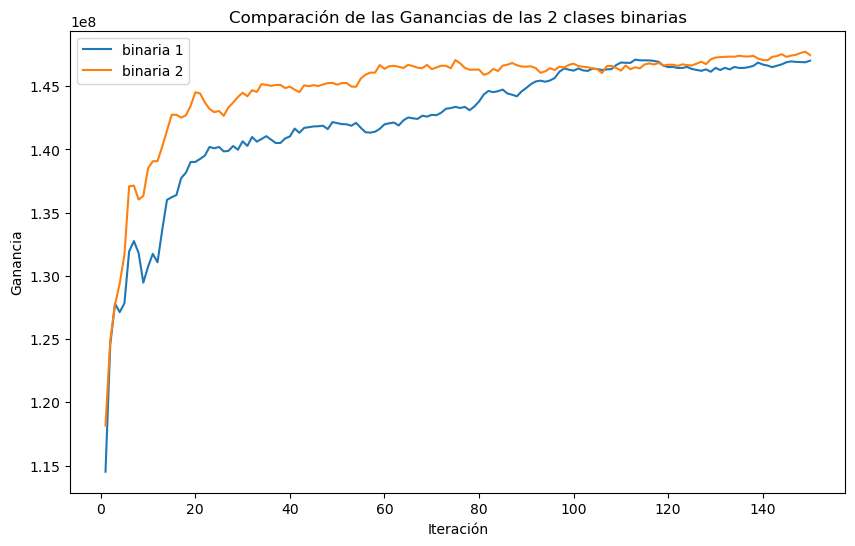

In [75]:
df_ganancias = pd.DataFrame({
    'binaria1': cv_results1['valid gan_eval-mean'],
    'binaria2': cv_results2['valid gan_eval-mean'],
    'Iteracion': range(1, len(cv_results1['valid gan_eval-mean']) + 1)
})

# Normalizamos la ganancias
df_ganancias['binaria1'] = df_ganancias['binaria1']*5
df_ganancias['binaria2'] = df_ganancias['binaria2']*5

plt.figure(figsize=(10, 6))
sns.lineplot(x='Iteracion', y='binaria1', data=df_ganancias, label='binaria 1')
sns.lineplot(x='Iteracion', y='binaria2', data=df_ganancias, label='binaria 2')
plt.title('Comparación de las Ganancias de las 2 clases binarias')
plt.xlabel('Iteración')
plt.ylabel('Ganancia')
plt.legend()
plt.show()

In [76]:
df_train.shape

(981946, 451)

In [77]:
def objective(trial):
    num_leaves = trial.suggest_int('num_leaves', 8, 100)
    learning_rate = trial.suggest_float('learning_rate', 0.00005, 0.3)  # mas bajo, más iteraciones necesita
    min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 1, 2000)
    feature_fraction = trial.suggest_float('feature_fraction', 0.1, 1.0)
    bagging_fraction = trial.suggest_float('bagging_fraction', 0.1, 1.0)

    params = {
        'objective': 'binary',
        'metric': 'custom', 
        'boosting_type': 'gbdt',
        'device': 'gpu',  # Usar la GPU
        'gpu_platform_id': 0,  # (opcional) ID de la plataforma GPU
        'gpu_device_id': 0,     # (opcional) ID del dispositivo GPU
        'first_metric_only': True,
        'boost_from_average': True,
        'feature_pre_filter': False,
        'max_bin': 31,
        'device': 'gpu',
        'num_leaves': num_leaves,
        'learning_rate': learning_rate,
        'min_data_in_leaf': min_data_in_leaf,
        'feature_fraction': feature_fraction,
        'bagging_fraction': bagging_fraction,
        'seed': semillas[0],
        'verbose': -1
    }

    train_data = lgb.Dataset(X_train,
                             label=y_train_binaria2,  # elegir la clase
                             weight=w_train)
                             
    cv_results = lgb.cv(
        params,
        train_data,
        num_boost_round=300,  # modificar, subir y subir... y descomentar la línea inferior
        
        feval=lgb_gan_eval,
        stratified=True,
        nfold=5,
        seed=semillas[0]
    )

    max_gan = max(cv_results['valid gan_eval-mean'])
    best_iter = cv_results['valid gan_eval-mean'].index(max_gan) + 1

    # Guardamos cual es la mejor iteración del modelo
    trial.set_user_attr("best_iter", best_iter)

    return max_gan * 5


storage_name = r"sqlite:///C:\Users\Admin\Documents\1_Notebook\1_Estudio\1_UBA_Maestria_DS\1_Especializacion\1_Segundo_Semestre\DMEyF\Optuna\rf_segmentacion1\optimization_tree.db"
study_name = "l_gbm_06_abril_junio"



study = optuna.create_study(
    direction="maximize",
    study_name=study_name,
    storage=storage_name,
    load_if_exists=True,
)

import optuna

class EarlyStoppingByImprovement:
    def __init__(self, patience: int):
        """
        Args:
            patience (int): Número de pruebas consecutivas sin mejora antes de detener la optimización.
        """
        self.patience = patience
        self.best_value = None
        self.no_improvement_trials = 0

    def __call__(self, study, trial):
        current_best_value = study.best_trial.value

        # Si la métrica mejora, reseteamos el contador
        if self.best_value is None or current_best_value > self.best_value:
            self.best_value = current_best_value
            self.no_improvement_trials = 0
        else:
            # Si no hay mejora, incrementamos el contador
            self.no_improvement_trials += 1

        # Detener si no ha habido mejora en 'self.patience' pruebas consecutivas
        if self.no_improvement_trials >= self.patience:
            print(f"Early stopping: No hay mejora en {self.patience} pruebas consecutivas.")
            study.stop()

# Crear el callback con 100 pruebas consecutivas sin mejora
early_stopping_callback = EarlyStoppingByImprovement(patience=300)

# Crear el estudio
study = optuna.create_study(
    direction="maximize",
    study_name=study_name,
    storage=storage_name,
    load_if_exists=True,
)

# Optimizar el estudio con el callback personalizado
study.optimize(objective, n_trials=30000)


[I 2024-10-04 10:54:20,015] Using an existing study with name 'l_gbm_06_abril_junio' instead of creating a new one.
[I 2024-10-04 10:54:20,053] Using an existing study with name 'l_gbm_06_abril_junio' instead of creating a new one.
[W 2024-10-04 10:54:31,710] Trial 607 failed with parameters: {'num_leaves': 71, 'learning_rate': 0.02798055430900174, 'min_data_in_leaf': 1409, 'feature_fraction': 0.42062598988826555, 'bagging_fraction': 0.6225721599171222} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\Admin\.conda\envs\datascience\Lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_23536\2557423713.py", line 33, in objective
    cv_results = lgb.cv(
                 ^^^^^^^
  File "c:\Users\Admin\.conda\envs\datascience\Lib\site-packages\lightgbm\engine.py", line 826, in cv
    cvfolds.update(fo

KeyboardInterrupt: 

In [78]:
best_params = study.best_params
print("Mejores parámetros:", best_params)

Mejores parámetros: {'num_leaves': 79, 'learning_rate': 0.03548862547724871, 'min_data_in_leaf': 1292, 'feature_fraction': 0.3710100409465106, 'bagging_fraction': 0.5824952965873172}


In [115]:
# optuna.visualization.plot_optimization_history(study)

In [116]:
# plot_param_importances(study)

In [117]:
# plot_slice(study)

In [469]:
plot_contour(study)

In [462]:
plot_contour(study, params=["max_depth", "min_samples_split"])

ValueError: Parameter max_depth does not exist in your study.

In [79]:
best_iter = study.best_trial.user_attrs["best_iter"]
print(f"Mejor cantidad de árboles para el mejor model {best_iter}")
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'first_metric_only': True,
    'boost_from_average': True,
    'feature_pre_filter': False,
    'max_bin': 31,
    'num_leaves': study.best_trial.params['num_leaves'],
    'learning_rate': study.best_trial.params['learning_rate'],
    'min_data_in_leaf': study.best_trial.params['min_data_in_leaf'],
    'feature_fraction': study.best_trial.params['feature_fraction'],
    'bagging_fraction': study.best_trial.params['bagging_fraction'],
    'seed': semillas[0],
    'verbose': 0
}

train_data = lgb.Dataset(X_train,
                          label=y_train_binaria2,
                          weight=w_train)

model = lgb.train(params,
                  train_data,
                  num_boost_round=best_iter)

Mejor cantidad de árboles para el mejor model 157
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


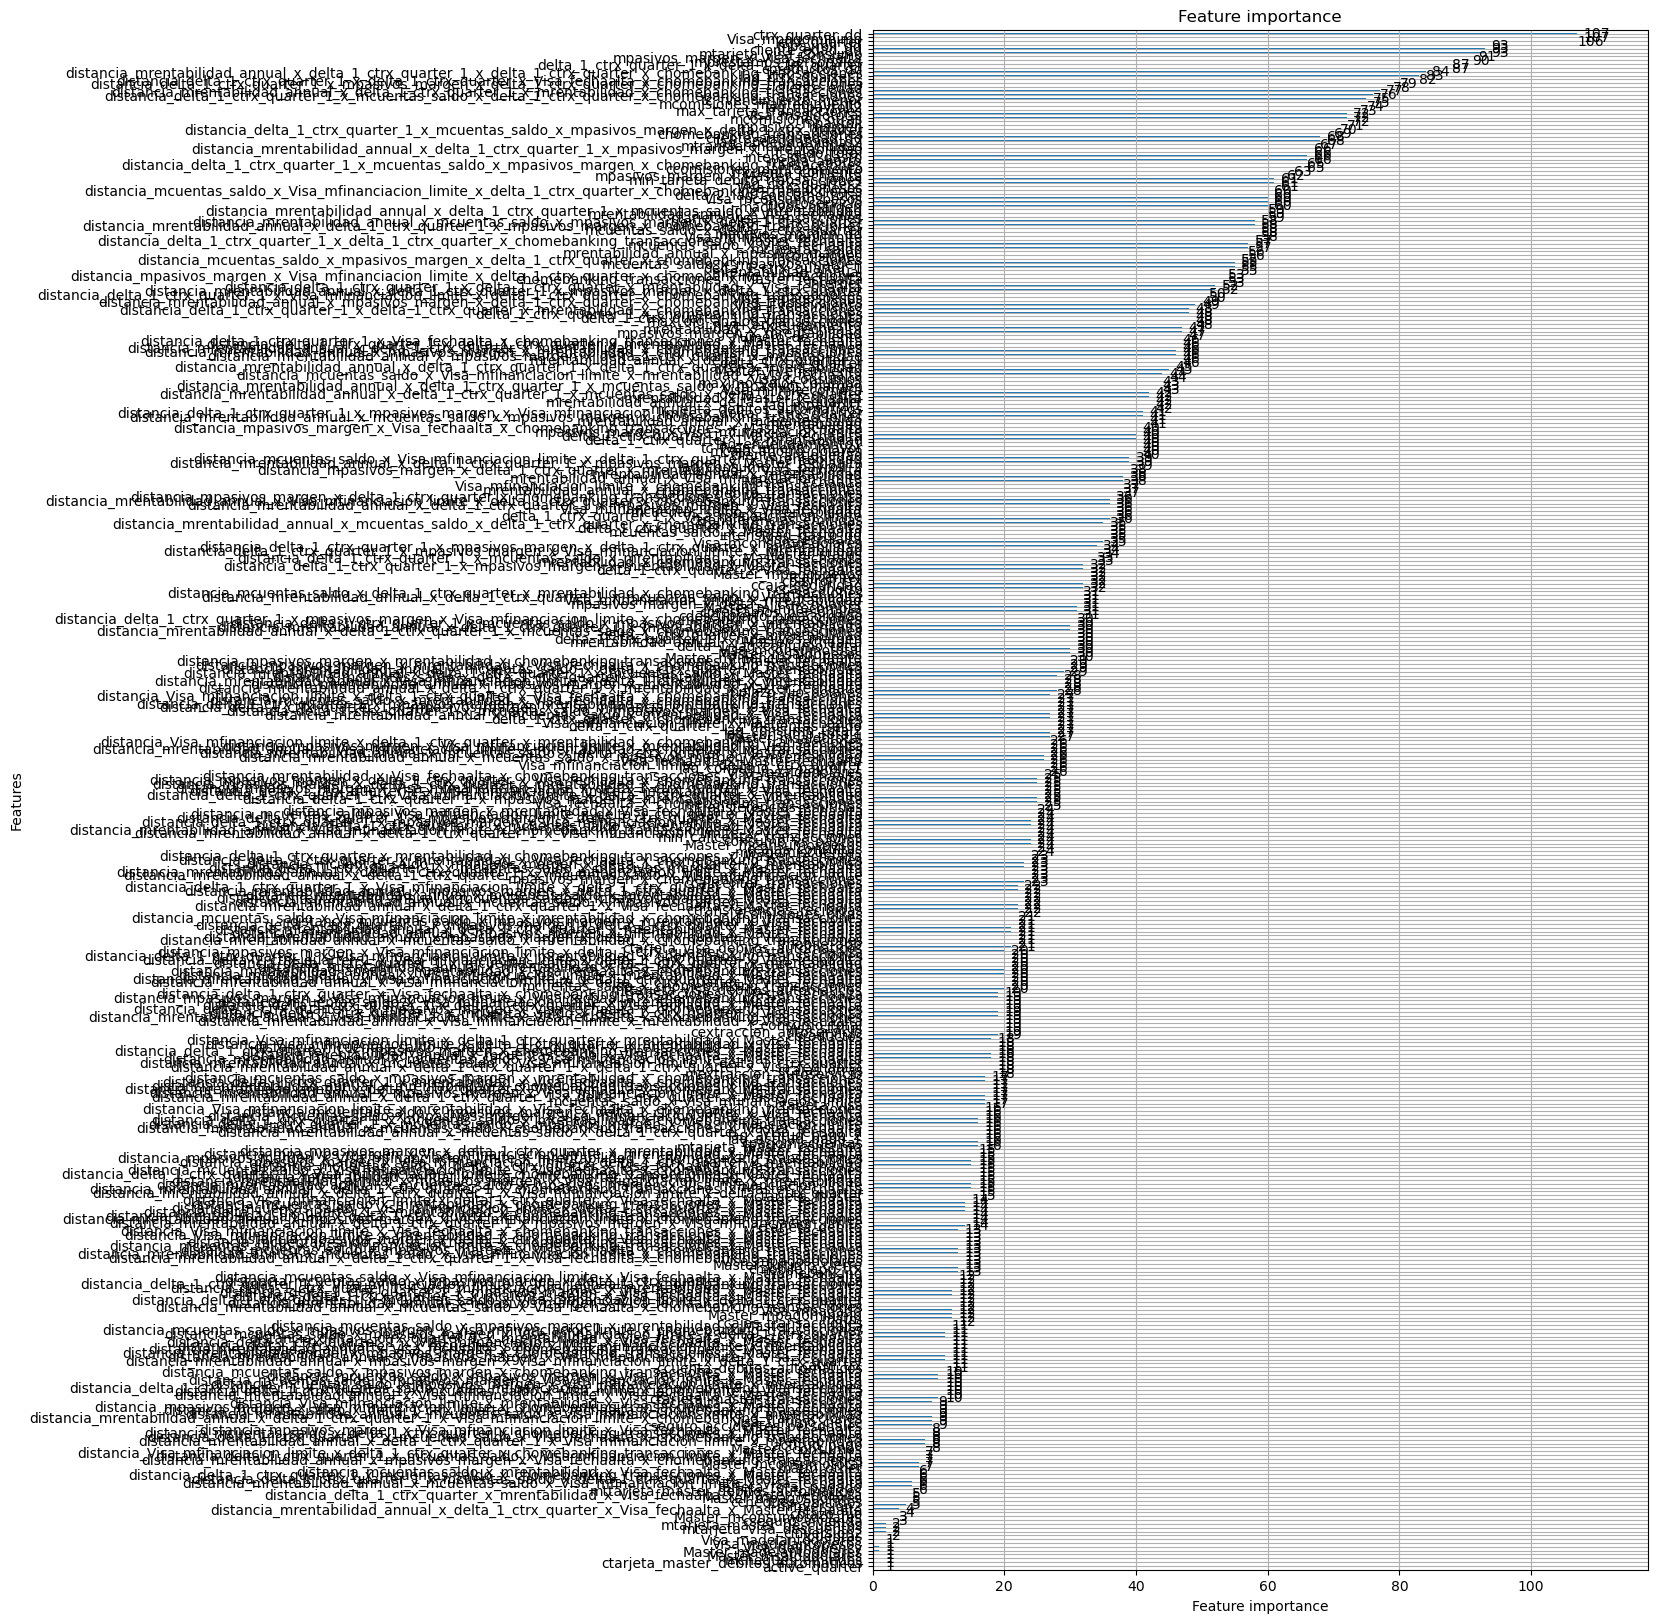

In [81]:
lgb.plot_importance(model, figsize=(10, 20))
plt.show()





In [80]:
# mes_test = 202106
# test_data = df_gbm[df_gbm['foto_mes'] == mes_test]


# X_test = test_data.drop(['clase_ternaria', 'clase_peso', 'clase_binaria1','clase_binaria2'], axis=1)
# y_test_binaria1 = test_data['clase_binaria1']
# y_test_class = test_data['clase_ternaria']
# w_test = test_data['clase_peso']

In [82]:
X_test.shape

(164876, 450)

In [80]:
y_pred_lgm = model.predict(X_test)

In [1]:
y_pred_lgm

NameError: name 'y_pred_lgm' is not defined

In [84]:
y_pred_labels = (y_pred_lgm > 0.025).astype(int)


In [85]:
df_train.columns

Index(['numero_de_cliente', 'foto_mes', 'active_quarter', 'cliente_vip',
       'internet', 'cliente_edad', 'cliente_antiguedad', 'mrentabilidad',
       'mrentabilidad_annual', 'mcomisiones',
       ...
       'mpayroll_dd', 'intensidad_gasto_dd', 'cproductos_dd',
       'max_tarjeta_transacciones', 'max_dig_analog_transacciones',
       'min_tarjeta_debito_transacciones', 'min_tarjeta_master_transacciones',
       'min_callcenter_transacciones', 'maximo_valor_columna',
       'days_since_primer_registro'],
      dtype='object', length=196)

In [83]:
#dataframe con las variables más importantes
importancias = model.feature_importance()
nombres = model.feature_name()
df_variables_importantes = pd.DataFrame({'importancia': importancias, 'variable': nombres})
df_variables_importantes = df_variables_importantes.sort_values(by='importancia', ascending=False)
lista_variables_importantes =  df_variables_importantes['variable'].head(10).to_list()

In [87]:
# def ensamblador_lgb (dataset, dataset_variables_importantes, cantidad_datasets):
#     variables_importantes = dataset_variables_importantes['importancia'].sort_values(ascending=False).to_list()
    
    
#     variables_dataset_1 = [] 
#     variables_dataset_2 = []
#     variables_dataset_3 = []
    
    
#     X = dataset.drop(columns=['clase_ternaria'])
#     y = dataset['clase_ternaria'].map(lambda x: 0 if x == 'CONTINUA' else 1)
    
    
#     dataset 
#     for x in len(variables_importantes//3):
#         contador = 0
#         variables_dataset_1.append(variable[contador])
#         variables_dataset_2.append(variable[contador+1])
#         variables_dataset_3.append(variable[contador+2])
#         contador += 3
    
#     dataset_0 = pd.DataFrame(dataset(columns=variables_dataset_1))
#     dataset_1 = pd.DataFrame(dataset(columns=variables_dataset_2))
#     dataset_2 = pd.DataFrame(dataset(columns=variables_dataset_2))
    
    

#     for variable in cortes:
    
#     X_train = 
#         def objective(trial):
#             num_leaves = trial.suggest_int('num_leaves', 8, 100)
#             learning_rate = trial.suggest_float('learning_rate', 0.005, 0.3)  # mas bajo, más iteraciones necesita
#             min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 1, 1000)
#             feature_fraction = trial.suggest_float('feature_fraction', 0.1, 1.0)
#             bagging_fraction = trial.suggest_float('bagging_fraction', 0.1, 1.0)

#             params = {
#                 'objective': 'binary',
#                 'metric': 'custom',
#                 'boosting_type': 'gbdt',
#                 'device': 'gpu',  # Usar la GPU
#                 'gpu_platform_id': 0,  # (opcional) ID de la plataforma GPU
#                 'gpu_device_id': 0,     # (opcional) ID del dispositivo GPU
#                 'first_metric_only': True,
#                 'boost_from_average': True,
#                 'feature_pre_filter': False,
#                 'max_bin': 31,
#                 'device': 'gpu',
#                 'num_leaves': num_leaves,
#                 'learning_rate': learning_rate,
#                 'min_data_in_leaf': min_data_in_leaf,
#                 'feature_fraction': feature_fraction,
#                 'bagging_fraction': bagging_fraction,
#                 'seed': semillas[0],
#                 'verbose': -1
#             }

#             train_data = lgb.Dataset(X_train,
#                                     label=y_train_binaria2,  # elegir la clase
#                                     weight=w_train)
                                    
#             cv_results = lgb.cv(
#                 params,
#                 train_data,
#                 num_boost_round=300,  # modificar, subir y subir... y descomentar la línea inferior
                
#                 feval=lgb_gan_eval,
#                 stratified=True,
#                 nfold=5,
#                 seed=semillas[0]
#             )

#             max_gan = max(cv_results['valid gan_eval-mean'])
#             best_iter = cv_results['valid gan_eval-mean'].index(max_gan) + 1

#             # Guardamos cual es la mejor iteración del modelo
#             trial.set_user_attr("best_iter", best_iter)

#             return max_gan * 5

#         modelo = 
        
#         storage_name = r"sqlite:///C:\Users\Admin\Documents\1_Notebook\1_Estudio\1_UBA_Maestria_DS\1_Especializacion\1_Segundo_Semestre\DMEyF\Optuna\rf_segmentacion1\optimization_tree.db"
#         study_name = "l_gbm_05_abril_junio"



#         study = optuna.create_study(
#             direction="maximize",
#             study_name=study_name,
#             storage=storage_name,
#             load_if_exists=True,
#         )


#         # Crear el estudio
#         study = optuna.create_study(
#             direction="maximize",
#             study_name=study_name,
#             storage=storage_name,
#             load_if_exists=True,
#         )

#         # Optimizar el estudio con el callback personalizado
#         study.optimize(objective, n_trials=1000, callbacks=[early_stopping_callback])

            

## Puntos de Corte

# Kaggle

In [88]:
df_resultado = pd.DataFrame({
    'numero_de_cliente': X_test['numero_de_cliente'],
    'Predicted': y_pred_labels
})

In [89]:

numero = '006'
entrega = f'entrega_{numero}.csv'
path = r"C:\Users\Admin\Documents\1_Notebook\1_Estudio\1_UBA_Maestria_DS\1_Especializacion\1_Segundo_Semestre\DMEyF\Entregas"
archivos = glob.glob(os.path.join(path, '*'))
archivos.sort(key=os.path.getmtime, reverse=True)
ultimo_archivo = archivos[0] if archivos else None
if ultimo_archivo:
    nombre_archivo = os.path.basename(ultimo_archivo)
    numero = ''.join(filter(str.isdigit, nombre_archivo))
    print(f"El último archivo entregado es: {nombre_archivo}")
    print(f"El número extraído es: {numero}")
else:
    print("No se encontraron archivos en la carpeta.")


 

El último archivo entregado es: entrega_038.csv
El número extraído es: 038


In [2]:
df_train

NameError: name 'df_train' is not defined

In [86]:

numero = '042'
entrega = f'entrega_{numero}.csv'

In [87]:


if os.path.exists(path + entrega):
    print("El archivo ya existe")
else:
    entrega_final = os.path.join(path, entrega)
    df_resultado.to_csv(entrega_final, index=False)
    


NameError: name 'path' is not defined

In [88]:
entrega_final

'C:\\Users\\Admin\\Documents\\1_Notebook\\1_Estudio\\1_UBA_Maestria_DS\\1_Especializacion\\1_Segundo_Semestre\\DMEyF\\Entregas\\entrega_042.csv'

In [89]:
cantidad_columnas = df_train.shape[1]
message = f"{entrega}, cantidad de columnas en el train: {cantidad_columnas}, modelo: LGBM, mejores parametros: {best_params}, mejor iteracion: {best_iter}, archivo: {entrega_final}"

### Kaggle

In [90]:

entrega_final = os.path.join(path, entrega)
entrega_final
competition= 'dm-ey-f-2024-primera'

In [91]:
kaggle.api.competition_submit(competition=competition, file_name= entrega_final, message=message, quiet=False)

100%|██████████| 2.08M/2.08M [00:01<00:00, 1.27MB/s]


Successfully submitted to DMEyF 2024 Primera

### Puntos de corte

In [ ]:
xdxdxd

In [ ]:

predicciones = y_pred_lgm

X_test['Probabilidad'] = predicciones

tb_entrega = X_test.sort_values(by='Probabilidad', ascending=False)

cortes = range(9000,14000,100)

num_subida_kaggle = 43
for envios in cortes:
    
    tb_entrega['Predicted'] = 0
    tb_entrega.iloc[:envios, tb_entrega.columns.get_loc('Predicted')] = 1
    resultados = tb_entrega[["numero_de_cliente", 'Predicted']].reset_index(drop=True)
    
    print("Cantidad de clientes {}".format(envios))
    
    nombre_archivo = 'entrega_0{}.csv'.format(num_subida_kaggle)
    entrega_final = os.path.join(path, nombre_archivo)
    resultados.to_csv(entrega_final, index=False)
    
    
    cantidad_columnas = df_train.shape[1]
    message = f"{entrega}, cantidad de columnas en el train: {cantidad_columnas}, modelo: LGBM, mejores parametros: {best_params}, mejor iteracion: {best_iter}, archivo: {entrega_final}, punto de corte: {envios}, optimizado con optuna: {study_name}"
    
    num_subida_kaggle += 1
    
    
    
    entrega_final = os.path.join(path, nombre_archivo)   
    competencia = 'dm-ey-f-2024-primera'
    try:
        api.competition_submit(file_name=entrega_final,message=message,competition=competencia)
    except:
        print(f"Numero máximo de envios, último envio ={num_subida_kaggle}")

Cantidad de clientes 9000


100%|██████████| 2.08M/2.08M [00:02<00:00, 1.01MB/s]


Cantidad de clientes 9100


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.34MB/s]


Cantidad de clientes 9200


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.32MB/s]


Cantidad de clientes 9300


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.31MB/s]


Cantidad de clientes 9400


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.33MB/s]


Cantidad de clientes 9500


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.34MB/s]


Cantidad de clientes 9600


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.32MB/s]


Cantidad de clientes 9700


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.33MB/s]


Cantidad de clientes 9800


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.32MB/s]


Cantidad de clientes 9900


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.33MB/s]


Cantidad de clientes 10000


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.32MB/s]


Cantidad de clientes 10100


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.32MB/s]


Cantidad de clientes 10200


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.31MB/s]


Cantidad de clientes 10300


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.32MB/s]


Cantidad de clientes 10400


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.29MB/s]


Cantidad de clientes 10500


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.35MB/s]


Numero máximo de envios, último envio =59
Cantidad de clientes 10600


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.35MB/s]


Cantidad de clientes 10700


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.40MB/s]


Cantidad de clientes 10800


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.33MB/s]


Cantidad de clientes 10900


 98%|█████████▊| 2.05M/2.08M [00:00<00:00, 2.82MB/s]

In [81]:
df_train.shape

(981946, 451)

In [82]:
nombre_modelo = 'lgbm_e_en_abril_p_en_junio_451_features.txt'
model.save_model(rf"C:\Users\Admin\Documents\1_Notebook\1_Estudio\1_UBA_Maestria_DS\1_Especializacion\1_Segundo_Semestre\DMEyF\modelos_lgbm\{nombre_modelo}")